In [2]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib as mlp
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os


In [3]:
bfri = pd.read_csv('/home/hduser/Desktop/BlackFriday.csv')

In [4]:
bfri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [5]:
bfri.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [6]:
bfri.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [7]:


print('Product_Category_2', bfri['Product_Category_2'].unique())
print('-----------------------------------------------------------------------------------')
print('Product_Category_3', bfri['Product_Category_3'].unique())

('Product_Category_2', array([ nan,   6.,  14.,   2.,   8.,  15.,  16.,  11.,   5.,   3.,   4.,
        12.,   9.,  10.,  17.,  13.,   7.,  18.]))
-----------------------------------------------------------------------------------
('Product_Category_3', array([ nan,  14.,  17.,   5.,   4.,  16.,  15.,   8.,   9.,  13.,   6.,
        12.,   3.,  18.,  11.,  10.]))


In [8]:
## So all values are in integer range. May be we can assign value zero for the NaN cases
bfri.fillna(value=0,inplace=True)
## Also looks like the product categories are float while they can be int.
bfri["Product_Category_2"] = bfri["Product_Category_2"].astype(int)
bfri["Product_Category_3"] = bfri["Product_Category_3"].astype(int)
print('Product_Category_2', bfri['Product_Category_2'].unique())
print('-----------------------------------------------------------------------------------')
print('Product_Category_3', bfri['Product_Category_3'].unique())


('Product_Category_2', array([ 0,  6, 14,  2,  8, 15, 16, 11,  5,  3,  4, 12,  9, 10, 17, 13,  7,
       18]))
-----------------------------------------------------------------------------------
('Product_Category_3', array([ 0, 14, 17,  5,  4, 16, 15,  8,  9, 13,  6, 12,  3, 18, 11, 10]))


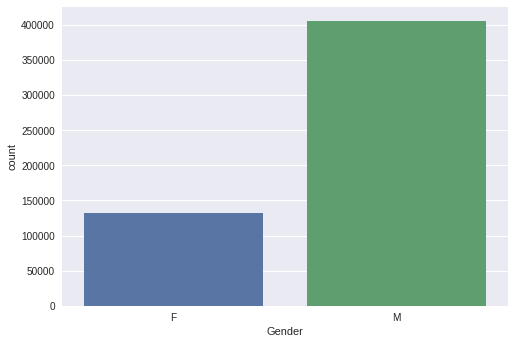

In [9]:
sns.countplot(bfri['Gender'])
plt.show()

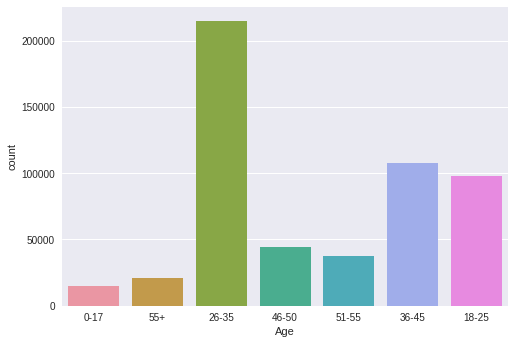

In [10]:
sns.countplot(bfri['Age'])
plt.show()

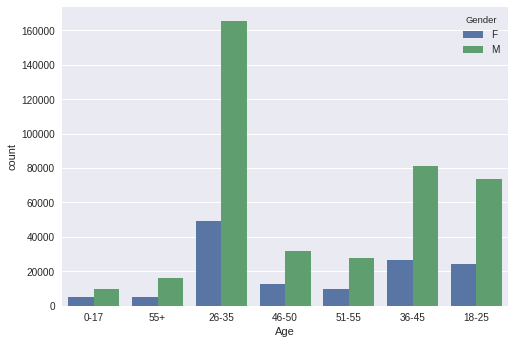

In [11]:
sns.countplot(bfri['Age'],hue=bfri['Gender'])
plt.show()

In [12]:
# to make an additional row with marriage and gender 
bfri['comb_G_M'] = bfri.apply(lambda x:'%s_%s' % (x['Gender'],x['Marital_Status']),axis=1)
print(bfri['comb_G_M'].unique())

['F_0' 'M_0' 'M_1' 'F_1']


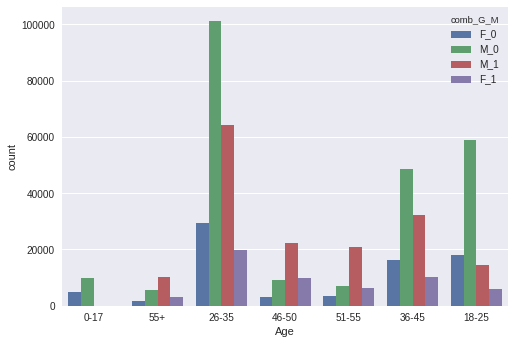

In [13]:
sns.countplot(bfri['Age'],hue=bfri['comb_G_M'])
plt.show()

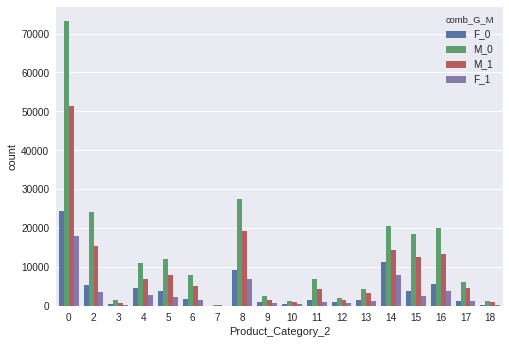

In [14]:
sns.countplot(bfri['Product_Category_2'],hue=bfri['comb_G_M'])
plt.show()

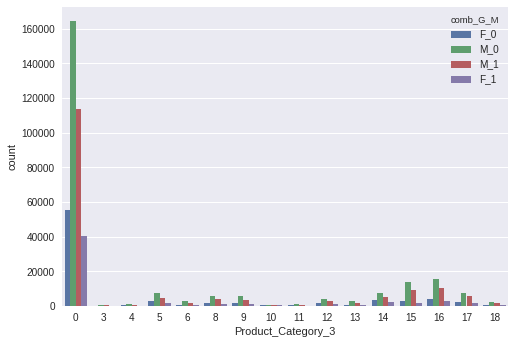

In [15]:
sns.countplot(bfri['Product_Category_3'],hue=bfri['comb_G_M'])
plt.show()

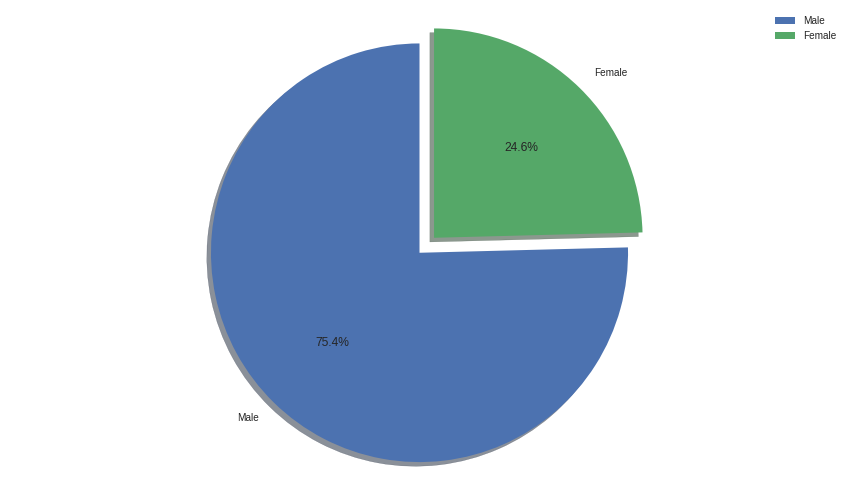

In [16]:
explode = (0.1,0)  
fig1, ax1 = plt.subplots(figsize=(12,7))
ax1.pie(bfri['Gender'].value_counts(), explode=explode,labels=['Male','Female'], autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()

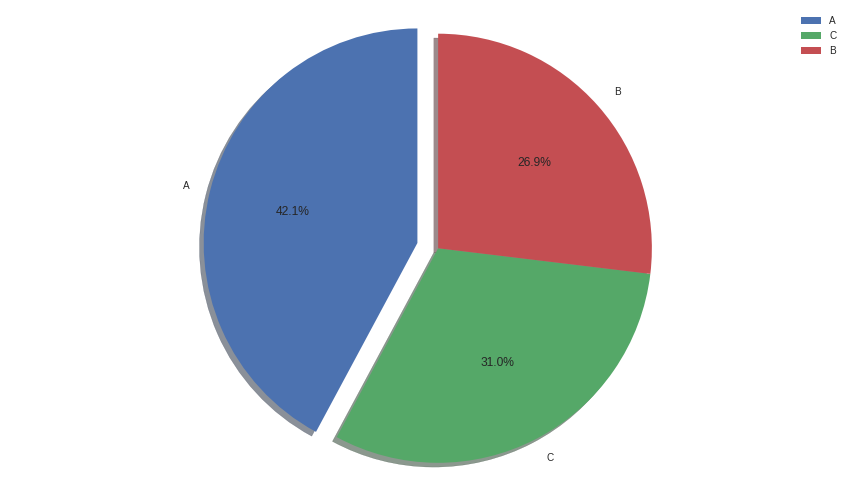

In [17]:
explode = (0.1, 0, 0)
fig1, ax1 = plt.subplots(figsize=(12,7))
ax1.pie(bfri['City_Category'].value_counts(),explode=explode, labels=bfri['City_Category'].unique(), autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()

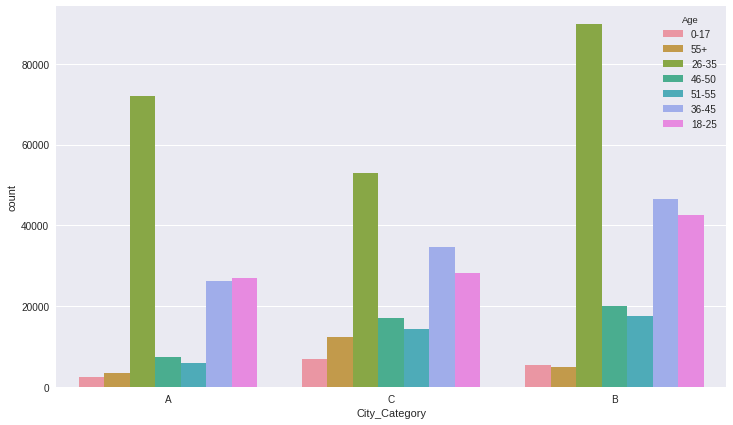

In [18]:
fig1, ax1 = plt.subplots(figsize=(12,7))
sns.countplot(bfri['City_Category'],hue=bfri['Age'])
plt.show()

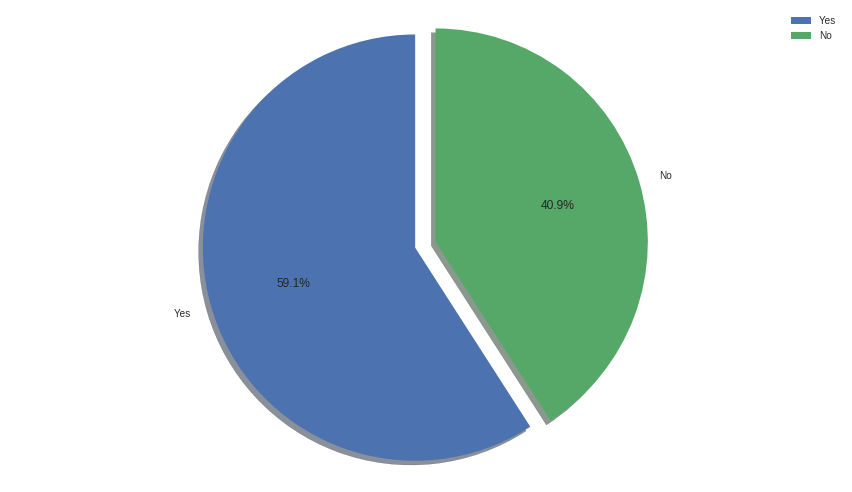

In [19]:
#label=['Underage 0-17','Retired +55','Middleage 26-35','46-50 y/o','Oldman 51-55','Middleage+ 36-45','Youth']
explode = (0.1, 0)
fig1, ax1 = plt.subplots(figsize=(12,7))
ax1.pie(bfri['Marital_Status'].value_counts(),explode=explode, labels=['Yes','No'], autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()

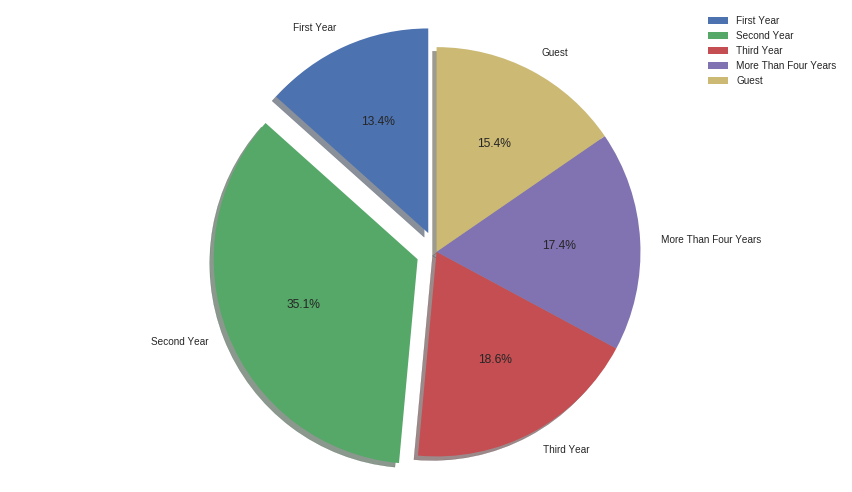

In [20]:
labels=['First Year','Second Year','Third Year','More Than Four Years','Guest']
explode = (0.1, 0.1,0,0,0)
fig1, ax1 = plt.subplots(figsize=(12,7))
ax1.pie(bfri.groupby('Stay_In_Current_City_Years')['Purchase'].sum(),explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()

In [21]:


#unique values in Gender parameter
gender = np.unique(bfri['Gender'])
gender



array(['F', 'M'], dtype=object)

In [22]:
def map_gender(gender):
    if gender == 'M':
        return 1
    else:
        return 0
bfri['Gender'] = bfri['Gender'].apply(map_gender)

In [23]:
def map_age(age):
    if age == '0-17':
        return 0
    elif age == '18-25':
        return 1
    elif age == '26-35':
        return 2
    elif age == '36-45':
        return 3
    elif age == '46-50':
        return 4
    elif age == '51-55':
        return 5
    else:
        return 6
bfri['Age'] = bfri['Age'].apply(map_age)

In [24]:
city_category = np.unique(bfri['City_Category'])
city_category

array(['A', 'B', 'C'], dtype=object)

In [25]:
def map_city_categories(city_category):
    if city_category == 'A':
        return 2
    elif city_category == 'B':
        return 1
    else:
        return 0
bfri['City_Category'] = bfri['City_Category'].apply(map_city_categories)

In [26]:
def map_stay(stay):
        if stay == '4+':
            return 4
        else:
            return int(stay)
#             current_years = stay
#             current_years = current_years.astype(int)
#             return current_years
bfri['Stay_In_Current_City_Years'] = bfri['Stay_In_Current_City_Years'].apply(map_stay)  

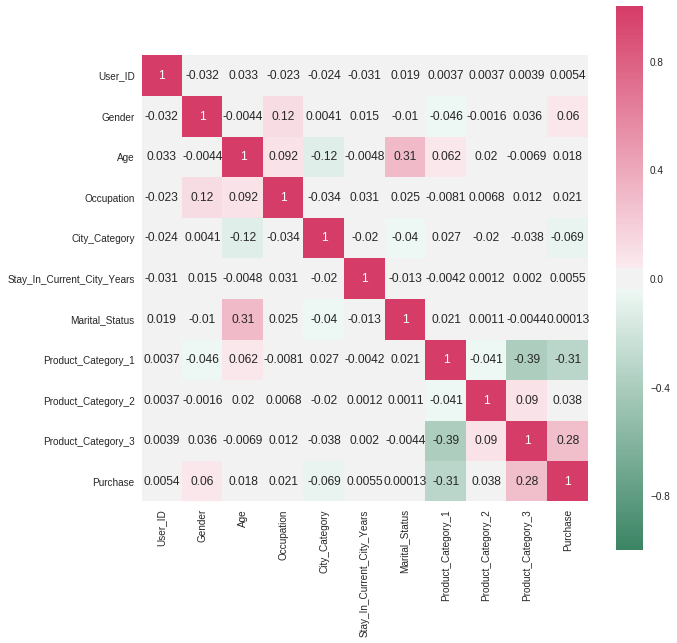

In [27]:
f , ax = plt.subplots(figsize=(10, 10))
corr = bfri.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(150, 1, as_cmap=True),
            square=True, ax=ax,annot=True)
plt.show()

In [28]:
count_cat = bfri['Gender'].value_counts()
count_cat

1    405380
0    132197
Name: Gender, dtype: int64

In [30]:
bfri['City_Category'].value_counts()

1    226493
0    166446
2    144638
Name: City_Category, dtype: int64